In [1]:
import os
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import xml.etree.ElementTree as ET

# Define the PascalVOCDataset class
class PascalVOCDataset(Dataset):
    def __init__(self, root, image_set='train', transform=None):
        self.root = root
        self.image_set = image_set
        self.transform = transform
        self.images = []
        self.labels = []

        # Load image paths and corresponding labels
        self._load_dataset()

    def _load_dataset(self):
        image_dir = os.path.join(self.root, 'JPEGImages')
        annotation_dir = os.path.join(self.root, 'Annotations')

        # Load images and annotations
        for image_file in os.listdir(image_dir):
            if image_file.endswith('.jpg'):
                self.images.append(os.path.join(image_dir, image_file))
                label_file = image_file.replace('.jpg', '.xml')
                self.labels.append(self._load_labels(os.path.join(annotation_dir, label_file)))

    def _load_labels(self, annotation_file):
        # Initialize an empty label array for 20 classes (Pascal VOC)
        labels = torch.zeros(20)
        tree = ET.parse(annotation_file)
        root = tree.getroot()

        # Loop through object tags in the XML file
        for obj in root.iter('object'):
            class_name = obj.find('name').text
            class_idx = self._class_name_to_index(class_name)
            if class_idx is not None:
                labels[class_idx] = 1  # Mark the presence of the class

        return labels

    def _class_name_to_index(self, class_name):
        classes = [
            'person', 'bird', 'cat', 'cow', 'dog', 'horse', 'sheep',
            'aeroplane', 'bicycle', 'boat', 'bus', 'car', 'motorbike',
            'train', 'tvmonitor', 'sofa', 'diningtable', 'chair', 'pottedplant',
            'bottle'  # Modify if needed
        ]
        if class_name in classes:
            return classes.index(class_name)
        return None

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx]).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load PascalVOC dataset
train_root_dir = r'C:\Users\bhara\Desktop\AIAss\Classification\VOC2012\VOCdevkit\VOC2012'  # Update this to your dataset path
train_dataset = PascalVOCDataset(root=train_root_dir, image_set='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Initialize the ResNet-50 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet50(pretrained=False, num_classes=20)  # Assuming 20 classes for PascalVOC
model = model.to(device)

# Define loss function (BCEWithLogitsLoss for multi-label classification)
criterion = nn.BCEWithLogitsLoss()

# Optimizer with L2 weight decay regularization
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Adjust weight_decay if needed

# Training loop
num_epochs = 10  # Adjust the number of epochs as needed
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()  # Zero the parameter gradients
        
        # Forward pass
        outputs = model(images)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    # Print average loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Save the trained model
torch.save(model.state_dict(), 'resnet50_with_weight_decay.pth')


c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/10], Loss: 0.1827


KeyboardInterrupt: 

In [3]:
pip install seaborn

  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/10], Loss: 0.1814
Epoch [2/10], Loss: 0.1700
Epoch [3/10], Loss: 0.1643
Epoch [4/10], Loss: 0.1604
Epoch [5/10], Loss: 0.1564
Epoch [6/10], Loss: 0.1519
Epoch [7/10], Loss: 0.1473
Epoch [8/10], Loss: 0.1436
Epoch [9/10], Loss: 0.1409
Epoch [10/10], Loss: 0.1381
Accuracy: 0.3459


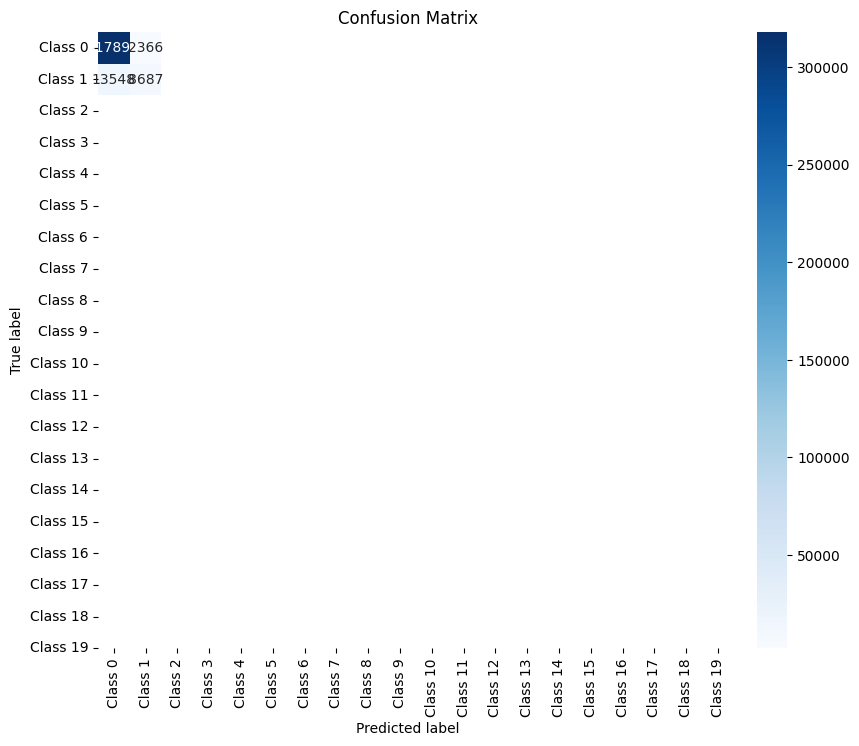

In [1]:
import os
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the PascalVOCDataset class
class PascalVOCDataset(Dataset):
    def __init__(self, root, image_set='train', transform=None):
        self.root = root
        self.image_set = image_set
        self.transform = transform
        self.images = []
        self.labels = []

        # Load image paths and corresponding labels
        self._load_dataset()

    def _load_dataset(self):
        image_dir = os.path.join(self.root, 'JPEGImages')
        annotation_dir = os.path.join(self.root, 'Annotations')

        # Load images and annotations
        for image_file in os.listdir(image_dir):
            if image_file.endswith('.jpg'):
                self.images.append(os.path.join(image_dir, image_file))
                label_file = image_file.replace('.jpg', '.xml')
                self.labels.append(self._load_labels(os.path.join(annotation_dir, label_file)))

    def _load_labels(self, annotation_file):
        # Initialize an empty label array for 20 classes (Pascal VOC)
        labels = torch.zeros(20)
        tree = ET.parse(annotation_file)
        root = tree.getroot()

        # Loop through object tags in the XML file
        for obj in root.iter('object'):
            class_name = obj.find('name').text
            class_idx = self._class_name_to_index(class_name)
            if class_idx is not None:
                labels[class_idx] = 1  # Mark the presence of the class

        return labels

    def _class_name_to_index(self, class_name):
        classes = [
            'person', 'bird', 'cat', 'cow', 'dog', 'horse', 'sheep',
            'aeroplane', 'bicycle', 'boat', 'bus', 'car', 'motorbike',
            'train', 'tvmonitor', 'sofa', 'table', 'chair', 'pottedplant',
            'apple', 'orange'  # Modify if needed
        ]
        if class_name in classes:
            return classes.index(class_name)
        return None

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = Image.open(self.images[idx]).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load PascalVOC dataset
train_root_dir = r'C:\Users\bhara\Desktop\AIAss\Classification\VOC2012\VOCdevkit\VOC2012'  # Update this to your dataset path
train_dataset = PascalVOCDataset(root=train_root_dir, image_set='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Initialize the ResNet-50 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet50(pretrained=False, num_classes=20)  # Assuming 20 classes for PascalVOC
model = model.to(device)

# Define loss function (BCEWithLogitsLoss for multi-label classification)
criterion = nn.BCEWithLogitsLoss()

# Optimizer with L2 weight decay regularization
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # Adjust weight_decay if needed

# Training loop
num_epochs = 10  # Adjust the number of epochs as needed
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()  # Zero the parameter gradients
        
        # Forward pass
        outputs = model(images)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    # Print average loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Save the trained model
torch.save(model.state_dict(), 'resnet50_with_weight_decay.pth')

# Evaluation
model.eval()  # Set model to evaluation mode

# Initialize lists to store true and predicted labels
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        # Apply sigmoid and threshold to get predictions
        preds = torch.sigmoid(outputs).cpu().numpy()
        preds = (preds > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)
        
        all_labels.append(labels.cpu().numpy())
        all_preds.append(preds)

# Concatenate all labels and predictions
all_labels = np.concatenate(all_labels)
all_preds = np.concatenate(all_preds)

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f'Accuracy: {accuracy:.4f}')

# Generate confusion matrix
confusion = confusion_matrix(all_labels.flatten(), all_preds.flatten())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(20)], yticklabels=[f'Class {i}' for i in range(20)])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


In [4]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import os

# Define the path to your trained model and the image you want to test
model_path = 'resnet50_with_weight_decay.pth'  # Update this path if needed
image_path = r'C:\Users\bhara\Desktop\AIAss\UnzippedFiles\VOC2012_test\VOC2012_test\JPEGImages\2008_000004.jpg'  # Update with your test image path

# Define transformations (should match the training transformations)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the size used during training
    transforms.ToTensor(),
])

# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet50(pretrained=False, num_classes=20)  # Adjust num_classes if needed
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Load and preprocess the image
image = Image.open(image_path).convert('RGB')
image = transform(image).unsqueeze(0)  # Add batch dimension

# Move image to the appropriate device
image = image.to(device)

# Make predictions
with torch.no_grad():  # Disable gradient calculation
    outputs = model(image)
    predictions = torch.sigmoid(outputs)  # Apply sigmoid for multi-label classification

# Convert predictions to binary (0 or 1)
predicted_labels = (predictions > 0.5).int()  # Use 0.5 as threshold for classification

# Print the predicted labels
class_names = [
    'person', 'bird', 'cat', 'cow', 'dog', 'horse', 'sheep',
    'aeroplane', 'bicycle', 'boat', 'bus', 'car', 'motorbike',
    'train', 'tvmonitor', 'sofa', 'table', 'chair', 'pottedplant',
    'apple', 'orange'
]

# Output the results
for idx, label in enumerate(predicted_labels[0]):
    if label.item() == 1:
        print(f"Detected: {class_names[idx]}")


C:\Users\bhara\AppData\Local\Temp\ipykernel_45856\226787930.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


In [5]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim

# Define the Pascal VOC Dataset class
class PascalVOCDataset(Dataset):
    def __init__(self, root, image_set='train', transform=None):
        self.root = root
        self.image_set = image_set
        self.transform = transform
        
        # List of class names in Pascal VOC
        self.class_names = [
            "aeroplane", "bicycle", "bird", "boat", "bottle",
            "bus", "car", "cat", "chair", "cow", 
            "diningtable", "dog", "horse", "motorbike", 
            "person", "pottedplant", "sheep", "sofa", 
            "train", "tvmonitor"
        ]
        
        # Create class index mapping
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}  
        self.image_ids = []
        self.labels = []
        self.load_data()

    def load_data(self):
        # Path to the image sets file
        image_set_file = os.path.join(self.root, 'ImageSets', 'Main', f'{self.image_set}.txt')
        
        with open(image_set_file, 'r') as f:
            image_ids = f.read().strip().split()

        # Loop through image IDs and load images and annotations
        for image_id in image_ids:
            image_path = os.path.join(self.root, 'JPEGImages', f'{image_id}.jpg')
            xml_path = os.path.join(self.root, 'Annotations', f'{image_id}.xml')
            label = self.parse_annotation(xml_path)
            self.image_ids.append(image_path)
            self.labels.append(label)

    def parse_annotation(self, xml_file):
        # This function extracts the main label (first object) from the XML file
        tree = ET.parse(xml_file)
        root = tree.getroot()

        # Extract the class name of the first object (single label classification)
        class_name = root.find('object').find('name').text
        if class_name in self.class_to_idx:
            return self.class_to_idx[class_name]
        else:
            return None

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image = Image.open(self.image_ids[idx]).convert("RGB")
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Single-label classification

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define the root directory of the dataset
root_dir = r'C:\Users\bhara\Desktop\AIAss\Classification\VOC2012\VOCdevkit\VOC2012'

# Create the train dataset and data loader
train_dataset = PascalVOCDataset(root=root_dir, image_set='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Create the validation dataset and data loader
val_dataset = PascalVOCDataset(root=root_dir, image_set='val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Initialize the ResNet-50 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet50(pretrained=True)  # Use pretrained weights
num_classes = len(train_dataset.class_names)  # Update num_classes according to your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Replace the final layer for single-label classification
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for single-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10  # Set the number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)
    
    # Print epoch loss and accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {correct / total:.4f}')

# Evaluation loop
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for images, targets in val_loader:
        images, targets = images.to(device), targets.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

    print(f'Validation Accuracy: {correct / total:.4f}')

# Save the trained model
torch.save(model.state_dict(), r'C:\Users\bhara\Desktop\AIAss\Classification\resnet50_single_label_model.pth')


c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Loss: 2.5416, Accuracy: 0.2165
Epoch [2/10], Loss: 2.2755, Accuracy: 0.2737
Epoch [3/10], Loss: 2.1733, Accuracy: 0.3012
Epoch [4/10], Loss: 2.0795, Accuracy: 0.3264
Epoch [5/10], Loss: 1.9767, Accuracy: 0.3677
Epoch [6/10], Loss: 1.8791, Accuracy: 0.3939
Epoch [7/10], Loss: 1.7958, Accuracy: 0.4242
Epoch [8/10], Loss: 1.7305, Accuracy: 0.4441
Epoch [9/10], Loss: 1.6369, Accuracy: 0.4728
Epoch [10/10], Loss: 1.5386, Accuracy: 0.4961
Validation Accuracy: 0.4151


C:\Users\bhara\AppData\Local\Temp\ipykernel_45856\2878252098.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=d

Predicted class: horse


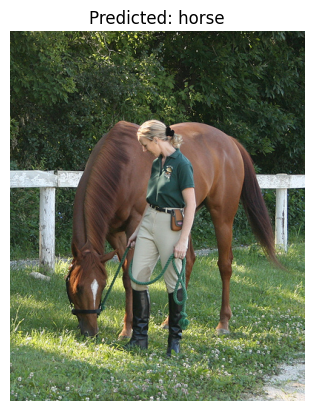

In [24]:
import torch
from PIL import Image
from torchvision import transforms, models
import torch.nn as nn
import matplotlib.pyplot as plt

# List of class names in Pascal VOC (same as used during training)
class_names = [
    "aeroplane", "bicycle", "bird", "boat", "bottle",
    "bus", "car", "cat", "chair", "cow", 
    "diningtable", "dog", "horse", "motorbike", 
    "person", "pottedplant", "sheep", "sofa", 
    "train", "tvmonitor"
]

# Path to the saved model and the single image
model_path = r'C:\Users\bhara\Desktop\AIAss\Classification\resnet50_single_label_model.pth'
image_path = r'C:\Users\bhara\Desktop\AIAss\UnzippedFiles\VOC2012_test\VOC2012_test\JPEGImages\2008_000046.jpg'  # Replace with your image path

# Define the transformations (should be the same as during training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet50(pretrained=False)
num_classes = len(class_names)  # Number of Pascal VOC classes
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Replace the final layer
model.load_state_dict(torch.load(model_path, map_location=device))  # Load the trained model weights
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Load and preprocess the image
image = Image.open(image_path).convert('RGB')  # Open the image
input_image = transform(image).unsqueeze(0).to(device)  # Apply transformations and add batch dimension

# Perform inference
with torch.no_grad():
    outputs = model(input_image)
    _, predicted = torch.max(outputs, 1)  # Get the class with the highest score

# Get the predicted class
predicted_class = class_names[predicted.item()]
print(f"Predicted class: {predicted_class}")

# Display the image with the predicted class
plt.imshow(image)  # Display the image
plt.title(f"Predicted: {predicted_class}")  # Set the title to predicted class
plt.axis('off')  # Hide axes
plt.show()


In [1]:
#Resnet 101


c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\bhara/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth
100%|██████████| 171M/171M [13:45<00:00, 217kB/s]  


Epoch [1/20], Loss: 2.6354, Accuracy: 0.2003
Epoch [2/20], Loss: 2.3670, Accuracy: 0.2489
Epoch [3/20], Loss: 2.2746, Accuracy: 0.2757
Epoch [4/20], Loss: 2.1553, Accuracy: 0.3075
Epoch [5/20], Loss: 2.0833, Accuracy: 0.3299
Epoch [6/20], Loss: 1.9859, Accuracy: 0.3675
Epoch [7/20], Loss: 1.9125, Accuracy: 0.3874
Epoch [8/20], Loss: 1.8319, Accuracy: 0.4116
Epoch [9/20], Loss: 1.7574, Accuracy: 0.4315
Epoch [10/20], Loss: 1.6790, Accuracy: 0.4460
Epoch [11/20], Loss: 1.5867, Accuracy: 0.4796
Epoch [12/20], Loss: 1.4714, Accuracy: 0.5108
Epoch [13/20], Loss: 1.3586, Accuracy: 0.5517
Epoch [14/20], Loss: 1.2347, Accuracy: 0.5882
Epoch [15/20], Loss: 1.0914, Accuracy: 0.6381
Epoch [16/20], Loss: 0.9140, Accuracy: 0.6911
Epoch [17/20], Loss: 0.7639, Accuracy: 0.7497
Epoch [18/20], Loss: 0.6083, Accuracy: 0.7941
Epoch [19/20], Loss: 0.4774, Accuracy: 0.8459
Epoch [20/20], Loss: 0.3906, Accuracy: 0.8704


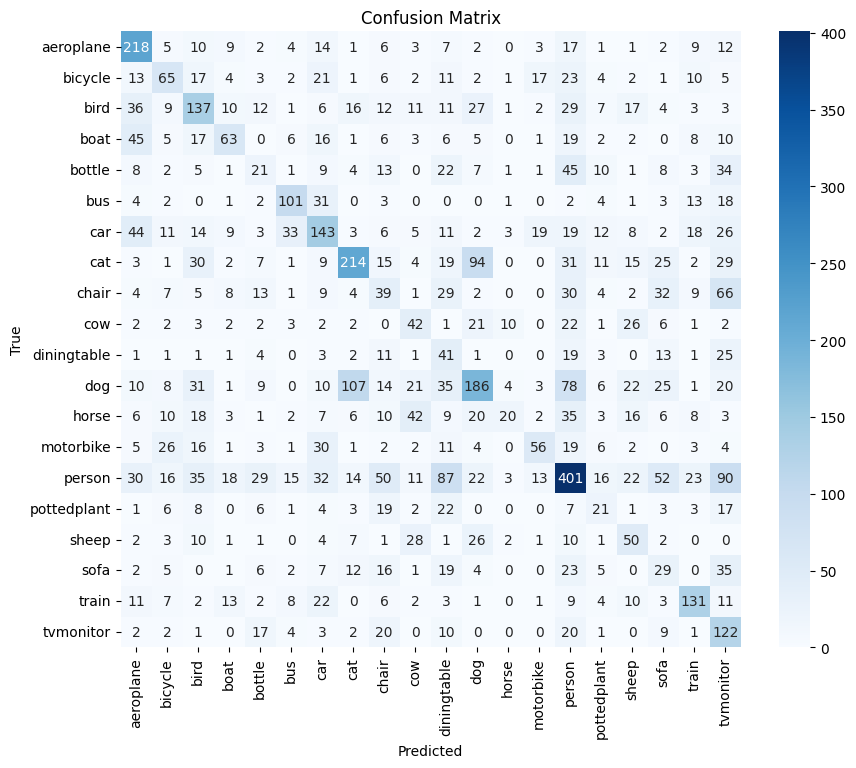

              precision    recall  f1-score   support

   aeroplane       0.49      0.67      0.56       326
     bicycle       0.34      0.31      0.32       210
        bird       0.38      0.39      0.38       354
        boat       0.43      0.29      0.35       215
      bottle       0.15      0.11      0.12       196
         bus       0.54      0.54      0.54       186
         car       0.37      0.37      0.37       391
         cat       0.54      0.42      0.47       512
       chair       0.15      0.15      0.15       265
         cow       0.23      0.28      0.25       150
 diningtable       0.12      0.32      0.17       128
         dog       0.44      0.31      0.37       591
       horse       0.43      0.09      0.15       227
   motorbike       0.47      0.29      0.36       192
      person       0.47      0.41      0.44       979
 pottedplant       0.17      0.17      0.17       124
       sheep       0.25      0.33      0.29       150
        sofa       0.13    

In [3]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the Pascal VOC Dataset class
class PascalVOCDataset(Dataset):
    def __init__(self, root, image_set='train', transform=None):
        self.root = root
        self.image_set = image_set
        self.transform = transform
        
        # List of class names in Pascal VOC
        self.class_names = [
            "aeroplane", "bicycle", "bird", "boat", "bottle",
            "bus", "car", "cat", "chair", "cow", 
            "diningtable", "dog", "horse", "motorbike", 
            "person", "pottedplant", "sheep", "sofa", 
            "train", "tvmonitor"
        ]
        
        # Create class index mapping
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}  
        self.image_ids = []
        self.labels = []
        self.load_data()

    def load_data(self):
        # Path to the image sets file
        image_set_file = os.path.join(self.root, 'ImageSets', 'Main', f'{self.image_set}.txt')
        
        with open(image_set_file, 'r') as f:
            image_ids = f.read().strip().split()

        # Loop through image IDs and load images and annotations
        for image_id in image_ids:
            image_path = os.path.join(self.root, 'JPEGImages', f'{image_id}.jpg')
            xml_path = os.path.join(self.root, 'Annotations', f'{image_id}.xml')
            label = self.parse_annotation(xml_path)
            self.image_ids.append(image_path)
            self.labels.append(label)

    def parse_annotation(self, xml_file):
        # This function extracts the main label (first object) from the XML file
        tree = ET.parse(xml_file)
        root = tree.getroot()

        # Extract the class name of the first object (single label classification)
        class_name = root.find('object').find('name').text
        if class_name in self.class_to_idx:
            return self.class_to_idx[class_name]
        else:
            return None

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image = Image.open(self.image_ids[idx]).convert("RGB")
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Single-label classification

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define the root directory of the dataset
root_dir = r'C:\Users\bhara\Desktop\AIAss\VOC2012\VOCdevkit\VOC2012'

# Create the train dataset and data loader
train_dataset = PascalVOCDataset(root=root_dir, image_set='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Create the validation dataset and data loader
val_dataset = PascalVOCDataset(root=root_dir, image_set='val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Initialize the ResNet-101 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet101(pretrained=True)  # Use pretrained weights
num_classes = len(train_dataset.class_names)  # Update num_classes according to your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Replace the final layer for single-label classification
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for single-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20  # Set the number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)
    
    # Print epoch loss and accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {correct / total:.4f}')

# Evaluation loop
all_preds = []
all_targets = []

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for images, targets in val_loader:
        images, targets = images.to(device), targets.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get class with highest score

        all_preds.extend(predicted.cpu().numpy())  # Store predicted labels
        all_targets.extend(targets.cpu().numpy())  # Store true labels

# Calculate confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.class_names, yticklabels=train_dataset.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(all_targets, all_preds, target_names=train_dataset.class_names))

# Save the trained model
torch.save(model.state_dict(), r'C:\Users\bhara\Desktop\AIAss\Classification\resnet101_single_label_model.pth')


C:\Users\bhara\AppData\Local\Temp\ipykernel_22048\1115911172.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=d

Predicted class: train


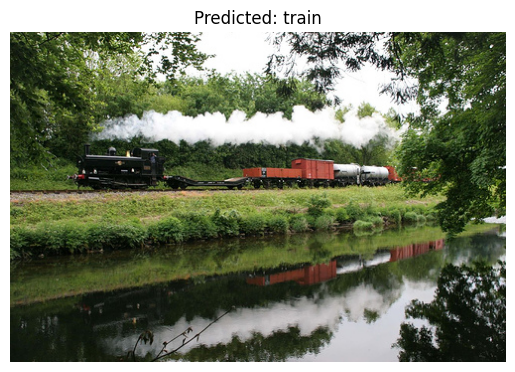

In [5]:
import torch
from PIL import Image
from torchvision import transforms, models
import torch.nn as nn
import matplotlib.pyplot as plt

# List of class names in Pascal VOC (same as used during training)
class_names = [
    "aeroplane", "bicycle", "bird", "boat", "bottle",
    "bus", "car", "cat", "chair", "cow", 
    "diningtable", "dog", "horse", "motorbike", 
    "person", "pottedplant", "sheep", "sofa", 
    "train", "tvmonitor"
]

# Path to the saved model and the single image
model_path = r'C:\Users\bhara\Desktop\AIAss\Classification\resnet101_single_label_model.pth'
image_path = r'C:\Users\bhara\Desktop\AIAss\UnzippedFiles\VOC2012_test\VOC2012_test\JPEGImages\2008_000083.jpg'  # Replace with your image path

# Define the transformations (should be the same as during training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet101(pretrained=False)
num_classes = len(class_names)  # Number of Pascal VOC classes
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Replace the final layer
model.load_state_dict(torch.load(model_path, map_location=device))  # Load the trained model weights
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Load and preprocess the image
image = Image.open(image_path).convert('RGB')  # Open the image
input_image = transform(image).unsqueeze(0).to(device)  # Apply transformations and add batch dimension

# Perform inference
with torch.no_grad():
    outputs = model(input_image)
    _, predicted = torch.max(outputs, 1)  # Get the class with the highest score

# Get the predicted class
predicted_class = class_names[predicted.item()]
print(f"Predicted class: {predicted_class}")

# Display the image with the predicted class
plt.imshow(image)  # Display the image
plt.title(f"Predicted: {predicted_class}")  # Set the title to predicted class
plt.axis('off')  # Hide axes
plt.show()


In [11]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import models  # Make sure to import models from torchvision

# Assume the PascalVOCDataset class and val_dataset are defined as in your previous code

# Define the model and load the saved model weights
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet101(pretrained=False)  # We use pretrained=False because we're loading custom weights
num_classes = len(val_dataset.class_names)  # Same as before
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Replace final layer as done previously
model.load_state_dict(torch.load(r'C:\Users\bhara\Desktop\AIAss\Classification\resnet101_single_label_model.pth'))  # Load your saved model
model.to(device)

# Set the model to evaluation mode
model.eval()

# Create DataLoader for validation dataset
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Initialize variables for validation
val_loss = 0.0
correct = 0
total = 0

# Evaluation loop
with torch.no_grad():
    for images, targets in val_loader:
        images, targets = images.to(device), targets.to(device)
        
        # Forward pass (inference)
        outputs = model(images)
        loss = criterion(outputs, targets)
        val_loss += loss.item()

        # Calculate validation accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

# Calculate validation loss and accuracy
val_loss /= len(val_loader)
val_accuracy = correct / total

# Print validation score
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\bhara\AppData\Local\Temp\ipykernel_27416\959776053.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_

Validation Loss: 3.1866, Validation Accuracy: 0.3606


In [13]:
import numpy as np
from sklearn.model_selection import ParameterGrid

# Define a grid of hyperparameters to try
param_grid = {
    'lr': [0.001, 0.0001],
    'weight_decay': [0.0, 0.0001, 0.001],
    'batch_size': [16, 32]
}

# Iterate over combinations of hyperparameters
for params in ParameterGrid(param_grid):
    print(f'Trying learning rate: {params["lr"]}, weight decay: {params["weight_decay"]}, batch size: {params["batch_size"]}')
    # Create your DataLoader, model, and optimizer with the current params
    # Train the model and evaluate performance
    # Store and compare validation accuracy/loss to find the best params


Trying learning rate: 0.001, weight decay: 0.0, batch size: 16
Trying learning rate: 0.001, weight decay: 0.0001, batch size: 16
Trying learning rate: 0.001, weight decay: 0.001, batch size: 16
Trying learning rate: 0.0001, weight decay: 0.0, batch size: 16
Trying learning rate: 0.0001, weight decay: 0.0001, batch size: 16
Trying learning rate: 0.0001, weight decay: 0.001, batch size: 16
Trying learning rate: 0.001, weight decay: 0.0, batch size: 32
Trying learning rate: 0.001, weight decay: 0.0001, batch size: 32
Trying learning rate: 0.001, weight decay: 0.001, batch size: 32
Trying learning rate: 0.0001, weight decay: 0.0, batch size: 32
Trying learning rate: 0.0001, weight decay: 0.0001, batch size: 32
Trying learning rate: 0.0001, weight decay: 0.001, batch size: 32


In [9]:
#Resnet 101 with weight decay

c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Loss: 2.6286, Accuracy: 0.1922
Epoch [2/20], Loss: 2.3454, Accuracy: 0.2526
Epoch [3/20], Loss: 2.3126, Accuracy: 0.2566
Epoch [4/20], Loss: 2.1787, Accuracy: 0.2998
Epoch [5/20], Loss: 2.1064, Accuracy: 0.3248
Epoch [6/20], Loss: 2.0363, Accuracy: 0.3465
Epoch [7/20], Loss: 1.9785, Accuracy: 0.3689
Epoch [8/20], Loss: 1.9187, Accuracy: 0.3902
Epoch [9/20], Loss: 1.8735, Accuracy: 0.3988
Epoch [10/20], Loss: 1.8136, Accuracy: 0.4186
Epoch [11/20], Loss: 1.7629, Accuracy: 0.4266
Epoch [12/20], Loss: 1.7159, Accuracy: 0.4474
Epoch [13/20], Loss: 1.6559, Accuracy: 0.4564
Epoch [14/20], Loss: 1.5981, Accuracy: 0.4752
Epoch [15/20], Loss: 1.5064, Accuracy: 0.4985
Epoch [16/20], Loss: 1.4412, Accuracy: 0.5178
Epoch [17/20], Loss: 1.3247, Accuracy: 0.5559
Epoch [18/20], Loss: 1.2509, Accuracy: 0.5790
Epoch [19/20], Loss: 1.1092, Accuracy: 0.6297
Epoch [20/20], Loss: 0.9971, Accuracy: 0.6656


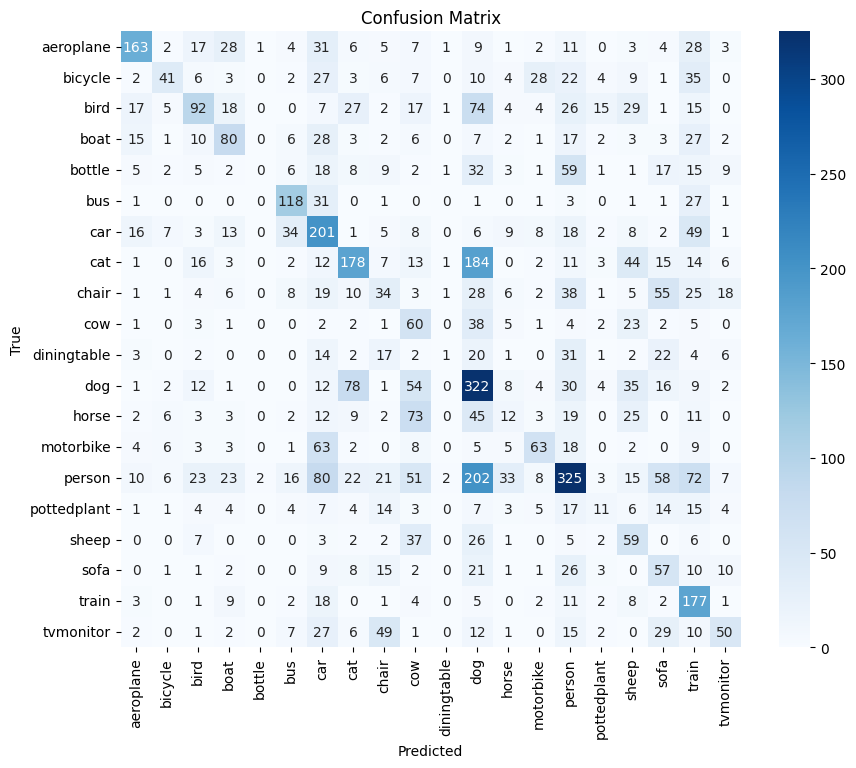

              precision    recall  f1-score   support

   aeroplane       0.66      0.50      0.57       326
     bicycle       0.51      0.20      0.28       210
        bird       0.43      0.26      0.32       354
        boat       0.40      0.37      0.38       215
      bottle       0.00      0.00      0.00       196
         bus       0.56      0.63      0.59       186
         car       0.32      0.51      0.40       391
         cat       0.48      0.35      0.40       512
       chair       0.18      0.13      0.15       265
         cow       0.17      0.40      0.24       150
 diningtable       0.12      0.01      0.01       128
         dog       0.31      0.54      0.39       591
       horse       0.12      0.05      0.07       227
   motorbike       0.46      0.33      0.38       192
      person       0.46      0.33      0.39       979
 pottedplant       0.19      0.09      0.12       124
       sheep       0.21      0.39      0.28       150
        sofa       0.19    

In [10]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the Pascal VOC Dataset class
class PascalVOCDataset(Dataset):
    def __init__(self, root, image_set='train', transform=None):
        self.root = root
        self.image_set = image_set
        self.transform = transform
        
        # List of class names in Pascal VOC
        self.class_names = [
            "aeroplane", "bicycle", "bird", "boat", "bottle",
            "bus", "car", "cat", "chair", "cow", 
            "diningtable", "dog", "horse", "motorbike", 
            "person", "pottedplant", "sheep", "sofa", 
            "train", "tvmonitor"
        ]
        
        # Create class index mapping
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}  
        self.image_ids = []
        self.labels = []
        self.load_data()

    def load_data(self):
        # Path to the image sets file
        image_set_file = os.path.join(self.root, 'ImageSets', 'Main', f'{self.image_set}.txt')
        
        with open(image_set_file, 'r') as f:
            image_ids = f.read().strip().split()

        # Loop through image IDs and load images and annotations
        for image_id in image_ids:
            image_path = os.path.join(self.root, 'JPEGImages', f'{image_id}.jpg')
            xml_path = os.path.join(self.root, 'Annotations', f'{image_id}.xml')
            label = self.parse_annotation(xml_path)
            self.image_ids.append(image_path)
            self.labels.append(label)

    def parse_annotation(self, xml_file):
        # This function extracts the main label (first object) from the XML file
        tree = ET.parse(xml_file)
        root = tree.getroot()

        # Extract the class name of the first object (single label classification)
        class_name = root.find('object').find('name').text
        if class_name in self.class_to_idx:
            return self.class_to_idx[class_name]
        else:
            return None

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image = Image.open(self.image_ids[idx]).convert("RGB")
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Single-label classification

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define the root directory of the dataset
root_dir = r'C:\Users\bhara\Desktop\AIAss\VOC2012\VOCdevkit\VOC2012'

# Create the train dataset and data loader
train_dataset = PascalVOCDataset(root=root_dir, image_set='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Create the validation dataset and data loader
val_dataset = PascalVOCDataset(root=root_dir, image_set='val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Initialize the ResNet-101 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet101(pretrained=True)  # Use pretrained weights
num_classes = len(train_dataset.class_names)  # Update num_classes according to your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Replace the final layer for single-label classification
model.to(device)

# Define loss function and optimizer with weight decay
criterion = nn.CrossEntropyLoss()  # Suitable for single-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Added weight decay

# Training loop
num_epochs = 20  # Set the number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)
    
    # Print epoch loss and accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {correct / total:.4f}')

# Evaluation loop
all_preds = []
all_targets = []

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for images, targets in val_loader:
        images, targets = images.to(device), targets.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get class with highest score

        all_preds.extend(predicted.cpu().numpy())  # Store predicted labels
        all_targets.extend(targets.cpu().numpy())  # Store true labels

# Calculate confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.class_names, yticklabels=train_dataset.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(all_targets, all_preds, target_names=train_dataset.class_names))

# Save the trained model
torch.save(model.state_dict(), r'C:\Users\bhara\Desktop\AIAss\Classification\resnet101_with_weight_decay.pth')


In [12]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import models  # Make sure to import models from torchvision

# Assume the PascalVOCDataset class and val_dataset are defined as in your previous code

# Define the model and load the saved model weights
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet101(pretrained=False)  # We use pretrained=False because we're loading custom weights
num_classes = len(val_dataset.class_names)  # Same as before
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Replace final layer as done previously
model.load_state_dict(torch.load(r'C:\Users\bhara\Desktop\AIAss\Classification\resnet101_with_weight_decay.pth'))  # Load your saved model
model.to(device)

# Set the model to evaluation mode
model.eval()

# Create DataLoader for validation dataset
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Define loss function
criterion = nn.CrossEntropyLoss()

# Initialize variables for validation
val_loss = 0.0
correct = 0
total = 0

# Evaluation loop
with torch.no_grad():
    for images, targets in val_loader:
        images, targets = images.to(device), targets.to(device)
        
        # Forward pass (inference)
        outputs = model(images)
        loss = criterion(outputs, targets)
        val_loss += loss.item()

        # Calculate validation accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

# Calculate validation loss and accuracy
val_loss /= len(val_loader)
val_accuracy = correct / total

# Print validation score
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


C:\Users\bhara\AppData\Local\Temp\ipykernel_27416\2977943844.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(r'C:\Users\bhara\Desktop\A

Validation Loss: 2.4391, Validation Accuracy: 0.3510


In [14]:
#Resnet 50

c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Loss: 2.4983, Accuracy: 0.2302
Epoch [2/20], Loss: 2.1861, Accuracy: 0.3037
Epoch [3/20], Loss: 2.1073, Accuracy: 0.3227
Epoch [4/20], Loss: 1.9740, Accuracy: 0.3713
Epoch [5/20], Loss: 1.8539, Accuracy: 0.4042
Epoch [6/20], Loss: 1.7669, Accuracy: 0.4254
Epoch [7/20], Loss: 1.6589, Accuracy: 0.4581
Epoch [8/20], Loss: 1.5410, Accuracy: 0.5001
Epoch [9/20], Loss: 1.4403, Accuracy: 0.5312
Epoch [10/20], Loss: 1.3312, Accuracy: 0.5597
Epoch [11/20], Loss: 1.1706, Accuracy: 0.6096
Epoch [12/20], Loss: 1.0126, Accuracy: 0.6601
Epoch [13/20], Loss: 0.8498, Accuracy: 0.7252
Epoch [14/20], Loss: 0.6968, Accuracy: 0.7665
Epoch [15/20], Loss: 0.5312, Accuracy: 0.8239
Epoch [16/20], Loss: 0.4124, Accuracy: 0.8613
Epoch [17/20], Loss: 0.3540, Accuracy: 0.8874
Epoch [18/20], Loss: 0.2524, Accuracy: 0.9197
Epoch [19/20], Loss: 0.2275, Accuracy: 0.9236
Epoch [20/20], Loss: 0.2287, Accuracy: 0.9255
Validation Accuracy: 0.4089


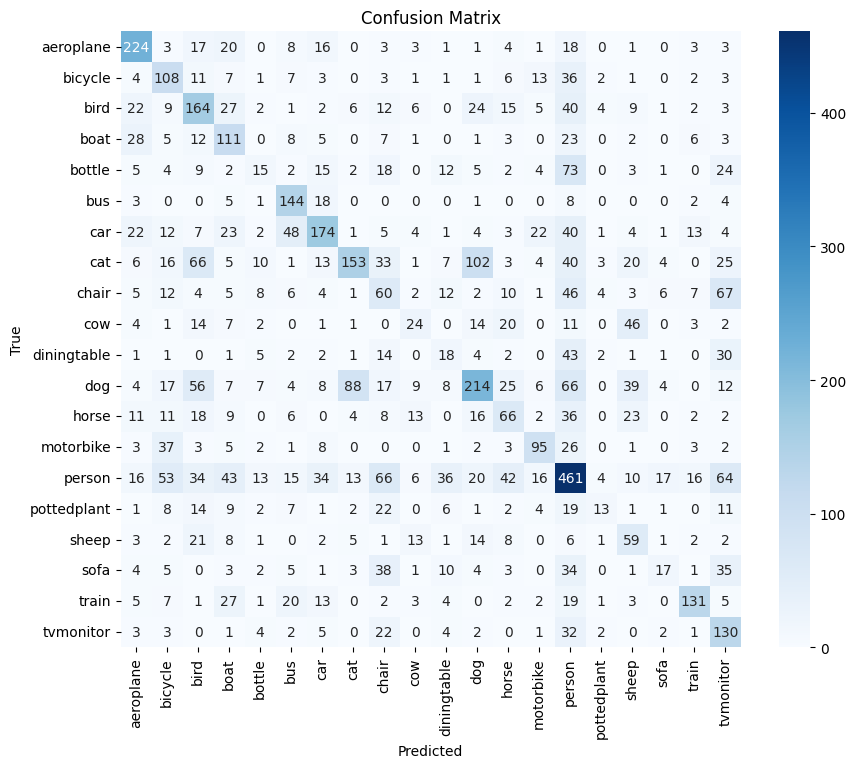

              precision    recall  f1-score   support

   aeroplane       0.60      0.69      0.64       326
     bicycle       0.34      0.51      0.41       210
        bird       0.36      0.46      0.41       354
        boat       0.34      0.52      0.41       215
      bottle       0.19      0.08      0.11       196
         bus       0.50      0.77      0.61       186
         car       0.54      0.45      0.49       391
         cat       0.55      0.30      0.39       512
       chair       0.18      0.23      0.20       265
         cow       0.28      0.16      0.20       150
 diningtable       0.15      0.14      0.14       128
         dog       0.50      0.36      0.42       591
       horse       0.30      0.29      0.30       227
   motorbike       0.54      0.49      0.52       192
      person       0.43      0.47      0.45       979
 pottedplant       0.35      0.10      0.16       124
       sheep       0.26      0.39      0.31       150
        sofa       0.30    

In [15]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Pascal VOC Dataset class
class PascalVOCDataset(Dataset):
    def __init__(self, root, image_set='train', transform=None):
        self.root = root
        self.image_set = image_set
        self.transform = transform
        
        # List of class names in Pascal VOC
        self.class_names = [
            "aeroplane", "bicycle", "bird", "boat", "bottle",
            "bus", "car", "cat", "chair", "cow", 
            "diningtable", "dog", "horse", "motorbike", 
            "person", "pottedplant", "sheep", "sofa", 
            "train", "tvmonitor"
        ]
        
        # Create class index mapping
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}  
        self.image_ids = []
        self.labels = []
        self.load_data()

    def load_data(self):
        # Path to the image sets file
        image_set_file = os.path.join(self.root, 'ImageSets', 'Main', f'{self.image_set}.txt')
        
        with open(image_set_file, 'r') as f:
            image_ids = f.read().strip().split()

        # Loop through image IDs and load images and annotations
        for image_id in image_ids:
            image_path = os.path.join(self.root, 'JPEGImages', f'{image_id}.jpg')
            xml_path = os.path.join(self.root, 'Annotations', f'{image_id}.xml')
            label = self.parse_annotation(xml_path)
            self.image_ids.append(image_path)
            self.labels.append(label)

    def parse_annotation(self, xml_file):
        # This function extracts the main label (first object) from the XML file
        tree = ET.parse(xml_file)
        root = tree.getroot()

        # Extract the class name of the first object (single label classification)
        class_name = root.find('object').find('name').text
        if class_name in self.class_to_idx:
            return self.class_to_idx[class_name]
        else:
            return None

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image = Image.open(self.image_ids[idx]).convert("RGB")
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Single-label classification

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define the root directory of the dataset
root_dir = r'C:\Users\bhara\Desktop\AIAss\VOC2012\VOCdevkit\VOC2012'

# Create the train dataset and data loader
train_dataset = PascalVOCDataset(root=root_dir, image_set='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Create the validation dataset and data loader
val_dataset = PascalVOCDataset(root=root_dir, image_set='val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Initialize the ResNet-50 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet50(pretrained=True)  # Use pretrained weights
num_classes = len(train_dataset.class_names)  # Update num_classes according to your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Replace the final layer for single-label classification
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for single-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20  # Set the number of epochs to 20
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)
    
    # Print epoch loss and accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {correct / total:.4f}')

# Evaluation loop
model.eval()  # Set the model to evaluation mode
all_preds = []
all_targets = []

with torch.no_grad():
    correct = 0
    total = 0
    for images, targets in val_loader:
        images, targets = images.to(device), targets.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

        # Store predictions and true labels for confusion matrix
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

    print(f'Validation Accuracy: {correct / total:.4f}')

# Calculate confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_dataset.class_names, yticklabels=val_dataset.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(all_targets, all_preds, target_names=val_dataset.class_names))

# Save the trained model
torch.save(model.state_dict(), r'C:\Users\bhara\Desktop\AIAss\Classification\resnet50_single_label_model_1.pth')


In [16]:
#Resnet 50 with weight decay


c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/50], Loss: 2.5601, Accuracy: 0.2270
Epoch [2/50], Loss: 2.2503, Accuracy: 0.2874
Epoch [3/50], Loss: 2.1358, Accuracy: 0.3162
Epoch [4/50], Loss: 2.0544, Accuracy: 0.3409
Epoch [5/50], Loss: 1.9583, Accuracy: 0.3736
Epoch [6/50], Loss: 1.8773, Accuracy: 0.3974
Epoch [7/50], Loss: 1.8249, Accuracy: 0.4174
Epoch [8/50], Loss: 1.7586, Accuracy: 0.4308
Epoch [9/50], Loss: 1.6865, Accuracy: 0.4581
Epoch [10/50], Loss: 1.5962, Accuracy: 0.4812
Epoch [11/50], Loss: 1.5488, Accuracy: 0.4889
Epoch [12/50], Loss: 1.4604, Accuracy: 0.5284
Epoch [13/50], Loss: 1.3616, Accuracy: 0.5538
Epoch [14/50], Loss: 1.2503, Accuracy: 0.5917
Epoch [15/50], Loss: 1.1156, Accuracy: 0.6297
Epoch [16/50], Loss: 1.0073, Accuracy: 0.6682
Epoch [17/50], Loss: 0.8811, Accuracy: 0.7086
Epoch [18/50], Loss: 0.7366, Accuracy: 0.7541
Epoch [19/50], Loss: 0.6576, Accuracy: 0.7800
Epoch [20/50], Loss: 0.5736, Accuracy: 0.8057
Epoch [21/50], Loss: 0.4774, Accuracy: 0.8426
Epoch [22/50], Loss: 0.3890, Accuracy: 0.87

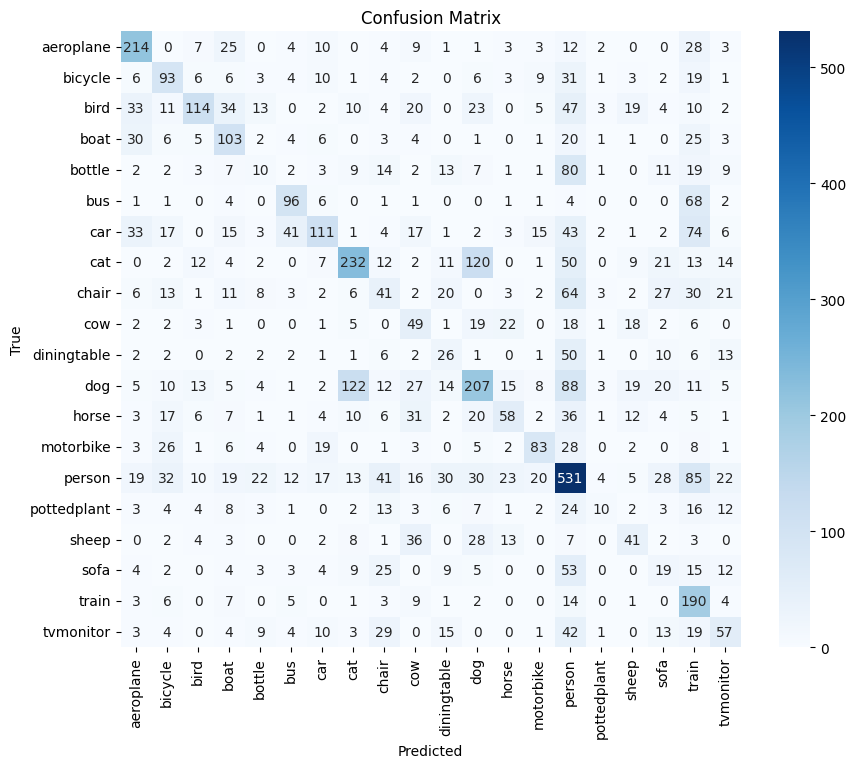

              precision    recall  f1-score   support

   aeroplane       0.58      0.66      0.61       326
     bicycle       0.37      0.44      0.40       210
        bird       0.60      0.32      0.42       354
        boat       0.37      0.48      0.42       215
      bottle       0.11      0.05      0.07       196
         bus       0.52      0.52      0.52       186
         car       0.51      0.28      0.37       391
         cat       0.54      0.45      0.49       512
       chair       0.18      0.15      0.17       265
         cow       0.21      0.33      0.25       150
 diningtable       0.17      0.20      0.19       128
         dog       0.43      0.35      0.39       591
       horse       0.39      0.26      0.31       227
   motorbike       0.54      0.43      0.48       192
      person       0.43      0.54      0.48       979
 pottedplant       0.29      0.08      0.13       124
       sheep       0.30      0.27      0.29       150
        sofa       0.11    

In [17]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Pascal VOC Dataset class
class PascalVOCDataset(Dataset):
    def __init__(self, root, image_set='train', transform=None):
        self.root = root
        self.image_set = image_set
        self.transform = transform
        
        # List of class names in Pascal VOC
        self.class_names = [
            "aeroplane", "bicycle", "bird", "boat", "bottle",
            "bus", "car", "cat", "chair", "cow", 
            "diningtable", "dog", "horse", "motorbike", 
            "person", "pottedplant", "sheep", "sofa", 
            "train", "tvmonitor"
        ]
        
        # Create class index mapping
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}  
        self.image_ids = []
        self.labels = []
        self.load_data()

    def load_data(self):
        # Path to the image sets file
        image_set_file = os.path.join(self.root, 'ImageSets', 'Main', f'{self.image_set}.txt')
        
        with open(image_set_file, 'r') as f:
            image_ids = f.read().strip().split()

        # Loop through image IDs and load images and annotations
        for image_id in image_ids:
            image_path = os.path.join(self.root, 'JPEGImages', f'{image_id}.jpg')
            xml_path = os.path.join(self.root, 'Annotations', f'{image_id}.xml')
            label = self.parse_annotation(xml_path)
            self.image_ids.append(image_path)
            self.labels.append(label)

    def parse_annotation(self, xml_file):
        # This function extracts the main label (first object) from the XML file
        tree = ET.parse(xml_file)
        root = tree.getroot()

        # Extract the class name of the first object (single label classification)
        class_name = root.find('object').find('name').text
        if class_name in self.class_to_idx:
            return self.class_to_idx[class_name]
        else:
            return None

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image = Image.open(self.image_ids[idx]).convert("RGB")
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Single-label classification

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define the root directory of the dataset
root_dir = r'C:\Users\bhara\Desktop\AIAss\VOC2012\VOCdevkit\VOC2012'

# Create the train dataset and data loader
train_dataset = PascalVOCDataset(root=root_dir, image_set='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Create the validation dataset and data loader
val_dataset = PascalVOCDataset(root=root_dir, image_set='val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Initialize the ResNet-50 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet50(pretrained=True)  # Use pretrained weights
num_classes = len(train_dataset.class_names)  # Update num_classes according to your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Replace the final layer for single-label classification
model.to(device)

# Define loss function and optimizer with weight decay
criterion = nn.CrossEntropyLoss()  # Suitable for single-label classification
weight_decay = 1e-4  # Set weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)

# Training loop
num_epochs = 50  # Set the number of epochs to 50
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)
    
    # Print epoch loss and accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {correct / total:.4f}')

# Evaluation loop
model.eval()  # Set the model to evaluation mode
all_preds = []
all_targets = []

with torch.no_grad():
    correct = 0
    total = 0
    for images, targets in val_loader:
        images, targets = images.to(device), targets.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

        # Store predictions and true labels for confusion matrix
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

    print(f'Validation Accuracy: {correct / total:.4f}')

# Calculate confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_dataset.class_names, yticklabels=val_dataset.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(all_targets, all_preds, target_names=val_dataset.class_names))

# Save the trained model
torch.save(model.state_dict(), r'C:\Users\bhara\Desktop\AIAss\Classification\resnet50_with_weight_decay_1.pth')


In [19]:
#Resnet 34


c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\bhara\Desktop\AIAss\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/30], Loss: 2.5914, Accuracy: 0.2204
Epoch [2/30], Loss: 2.1823, Accuracy: 0.3117
Epoch [3/30], Loss: 1.9641, Accuracy: 0.3768
Epoch [4/30], Loss: 1.8044, Accuracy: 0.4331
Epoch [5/30], Loss: 1.6084, Accuracy: 0.4903
Epoch [6/30], Loss: 1.4509, Accuracy: 0.5435
Epoch [7/30], Loss: 1.2817, Accuracy: 0.5823
Epoch [8/30], Loss: 1.0729, Accuracy: 0.6517
Epoch [9/30], Loss: 0.8549, Accuracy: 0.7243
Epoch [10/30], Loss: 0.6645, Accuracy: 0.7842
Epoch [11/30], Loss: 0.4837, Accuracy: 0.8393
Epoch [12/30], Loss: 0.3872, Accuracy: 0.8727
Epoch [13/30], Loss: 0.3160, Accuracy: 0.8940
Epoch [14/30], Loss: 0.2300, Accuracy: 0.9267
Epoch [15/30], Loss: 0.2165, Accuracy: 0.9300
Epoch [16/30], Loss: 0.1713, Accuracy: 0.9442
Epoch [17/30], Loss: 0.1684, Accuracy: 0.9444
Epoch [18/30], Loss: 0.1817, Accuracy: 0.9402
Epoch [19/30], Loss: 0.1348, Accuracy: 0.9554
Epoch [20/30], Loss: 0.1400, Accuracy: 0.9556
Epoch [21/30], Loss: 0.1299, Accuracy: 0.9559
Epoch [22/30], Loss: 0.1109, Accuracy: 0.96

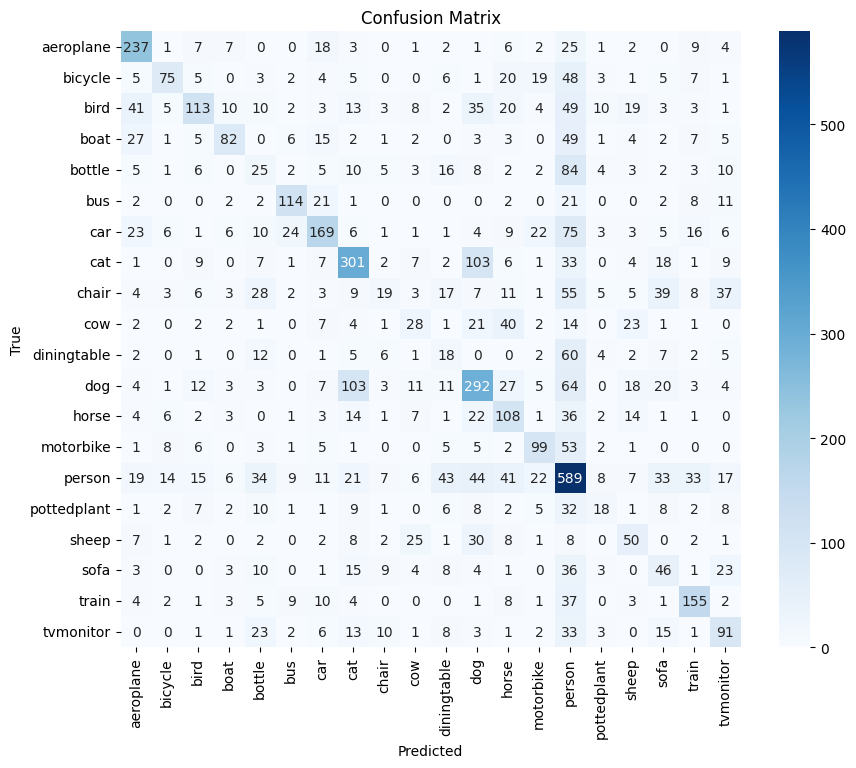

              precision    recall  f1-score   support

   aeroplane       0.60      0.73      0.66       326
     bicycle       0.60      0.36      0.45       210
        bird       0.56      0.32      0.41       354
        boat       0.62      0.38      0.47       215
      bottle       0.13      0.13      0.13       196
         bus       0.65      0.61      0.63       186
         car       0.57      0.43      0.49       391
         cat       0.55      0.59      0.57       512
       chair       0.27      0.07      0.11       265
         cow       0.26      0.19      0.22       150
 diningtable       0.12      0.14      0.13       128
         dog       0.49      0.49      0.49       591
       horse       0.34      0.48      0.40       227
   motorbike       0.52      0.52      0.52       192
      person       0.42      0.60      0.49       979
 pottedplant       0.27      0.15      0.19       124
       sheep       0.31      0.33      0.32       150
        sofa       0.22    

In [1]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Pascal VOC Dataset class
class PascalVOCDataset(Dataset):
    def __init__(self, root, image_set='train', transform=None):
        self.root = root
        self.image_set = image_set
        self.transform = transform
        
        # List of class names in Pascal VOC
        self.class_names = [
            "aeroplane", "bicycle", "bird", "boat", "bottle",
            "bus", "car", "cat", "chair", "cow", 
            "diningtable", "dog", "horse", "motorbike", 
            "person", "pottedplant", "sheep", "sofa", 
            "train", "tvmonitor"
        ]
        
        # Create class index mapping
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}  
        self.image_ids = []
        self.labels = []
        self.load_data()

    def load_data(self):
        # Path to the image sets file
        image_set_file = os.path.join(self.root, 'ImageSets', 'Main', f'{self.image_set}.txt')
        
        with open(image_set_file, 'r') as f:
            image_ids = f.read().strip().split()

        # Loop through image IDs and load images and annotations
        for image_id in image_ids:
            image_path = os.path.join(self.root, 'JPEGImages', f'{image_id}.jpg')
            xml_path = os.path.join(self.root, 'Annotations', f'{image_id}.xml')
            label = self.parse_annotation(xml_path)
            self.image_ids.append(image_path)
            self.labels.append(label)

    def parse_annotation(self, xml_file):
        # This function extracts the main label (first object) from the XML file
        tree = ET.parse(xml_file)
        root = tree.getroot()

        # Extract the class name of the first object (single label classification)
        class_name = root.find('object').find('name').text
        if class_name in self.class_to_idx:
            return self.class_to_idx[class_name]
        else:
            return None

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image = Image.open(self.image_ids[idx]).convert("RGB")
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Single-label classification

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define the root directory of the dataset
root_dir = r'C:\Users\bhara\Desktop\AIAss\VOC2012\VOCdevkit\VOC2012'

# Create the train dataset and data loader
train_dataset = PascalVOCDataset(root=root_dir, image_set='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Create the validation dataset and data loader
val_dataset = PascalVOCDataset(root=root_dir, image_set='val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Initialize the ResNet-50 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet34(pretrained=True)  # Use pretrained weights
num_classes = len(train_dataset.class_names)  # Update num_classes according to your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Replace the final layer for single-label classification
model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for single-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 30  # Set the number of epochs to 20
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)
    
    # Print epoch loss and accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {correct / total:.4f}')

# Evaluation loop
model.eval()  # Set the model to evaluation mode
all_preds = []
all_targets = []

with torch.no_grad():
    correct = 0
    total = 0
    for images, targets in val_loader:
        images, targets = images.to(device), targets.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

        # Store predictions and true labels for confusion matrix
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

    print(f'Validation Accuracy: {correct / total:.4f}')

# Calculate confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_dataset.class_names, yticklabels=val_dataset.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(all_targets, all_preds, target_names=val_dataset.class_names))

# Save the trained model
torch.save(model.state_dict(), r'C:\Users\bhara\Desktop\AIAss\Classification\resnet34_single_label_model.pth')


In [2]:
#Resnet34 with weight decay

In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Pascal VOC Dataset class
class PascalVOCDataset(Dataset):
    def __init__(self, root, image_set='train', transform=None):
        self.root = root
        self.image_set = image_set
        self.transform = transform
        
        # List of class names in Pascal VOC
        self.class_names = [
            "aeroplane", "bicycle", "bird", "boat", "bottle",
            "bus", "car", "cat", "chair", "cow", 
            "diningtable", "dog", "horse", "motorbike", 
            "person", "pottedplant", "sheep", "sofa", 
            "train", "tvmonitor"
        ]
        
        # Create class index mapping
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}  
        self.image_ids = []
        self.labels = []
        self.load_data()

    def load_data(self):
        # Path to the image sets file
        image_set_file = os.path.join(self.root, 'ImageSets', 'Main', f'{self.image_set}.txt')
        
        with open(image_set_file, 'r') as f:
            image_ids = f.read().strip().split()

        # Loop through image IDs and load images and annotations
        for image_id in image_ids:
            image_path = os.path.join(self.root, 'JPEGImages', f'{image_id}.jpg')
            xml_path = os.path.join(self.root, 'Annotations', f'{image_id}.xml')
            label = self.parse_annotation(xml_path)
            self.image_ids.append(image_path)
            self.labels.append(label)

    def parse_annotation(self, xml_file):
        # This function extracts the main label (first object) from the XML file
        tree = ET.parse(xml_file)
        root = tree.getroot()

        # Extract the class name of the first object (single label classification)
        class_name = root.find('object').find('name').text
        if class_name in self.class_to_idx:
            return self.class_to_idx[class_name]
        else:
            return None

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image = Image.open(self.image_ids[idx]).convert("RGB")
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Single-label classification

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define the root directory of the dataset
root_dir = r'C:\Users\bhara\Desktop\AIAss\VOC2012\VOCdevkit\VOC2012'

# Create the train dataset and data loader
train_dataset = PascalVOCDataset(root=root_dir, image_set='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Create the validation dataset and data loader
val_dataset = PascalVOCDataset(root=root_dir, image_set='val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Initialize the ResNet-50 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet34(pretrained=True)  # Use pretrained weights
num_classes = len(train_dataset.class_names)  # Update num_classes according to your dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Replace the final layer for single-label classification
model.to(device)

# Define loss function and optimizer with weight decay
criterion = nn.CrossEntropyLoss()  # Suitable for single-label classification
weight_decay = 1e-4  # Set weight decay (regularization)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=weight_decay)  # Added weight decay

# Training loop
num_epochs = 30  # Set the number of epochs to 30
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)
    
    # Print epoch loss and accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {correct / total:.4f}')

# Evaluation loop
model.eval()  # Set the model to evaluation mode
all_preds = []
all_targets = []

with torch.no_grad():
    correct = 0
    total = 0
    for images, targets in val_loader:
        images, targets = images.to(device), targets.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

        # Store predictions and true labels for confusion matrix
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

    print(f'Validation Accuracy: {correct / total:.4f}')

# Calculate confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_dataset.class_names, yticklabels=val_dataset.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(all_targets, all_preds, target_names=val_dataset.class_names))

# Save the trained model
torch.save(model.state_dict(), r'C:\Users\bhara\Desktop\AIAss\Classification\resnet34_with_weight_decay.pth')


In [6]:
#ResNet34 with dropout and weight decay

Epoch [1/30], Loss: 2.6755, Accuracy: 0.2029
Epoch [2/30], Loss: 2.4544, Accuracy: 0.2384
Epoch [3/30], Loss: 2.3395, Accuracy: 0.2529
Epoch [4/30], Loss: 2.3112, Accuracy: 0.2653
Epoch [5/30], Loss: 2.2246, Accuracy: 0.2939
Epoch [6/30], Loss: 2.1800, Accuracy: 0.3077
Epoch [7/30], Loss: 2.1235, Accuracy: 0.3225
Epoch [8/30], Loss: 2.0910, Accuracy: 0.3330
Epoch [9/30], Loss: 2.0259, Accuracy: 0.3484
Epoch [10/30], Loss: 1.9850, Accuracy: 0.3588
Epoch [11/30], Loss: 1.9468, Accuracy: 0.3694
Epoch [12/30], Loss: 1.8995, Accuracy: 0.3878
Epoch [13/30], Loss: 1.8224, Accuracy: 0.4049
Epoch [14/30], Loss: 1.8052, Accuracy: 0.4275
Epoch [15/30], Loss: 1.7469, Accuracy: 0.4322
Epoch [16/30], Loss: 1.6456, Accuracy: 0.4586
Epoch [17/30], Loss: 1.6091, Accuracy: 0.4765
Epoch [18/30], Loss: 1.5295, Accuracy: 0.4957
Epoch [19/30], Loss: 1.4687, Accuracy: 0.5136
Epoch [20/30], Loss: 1.3396, Accuracy: 0.5681
Epoch [21/30], Loss: 1.2643, Accuracy: 0.5851
Epoch [22/30], Loss: 1.2044, Accuracy: 0.60

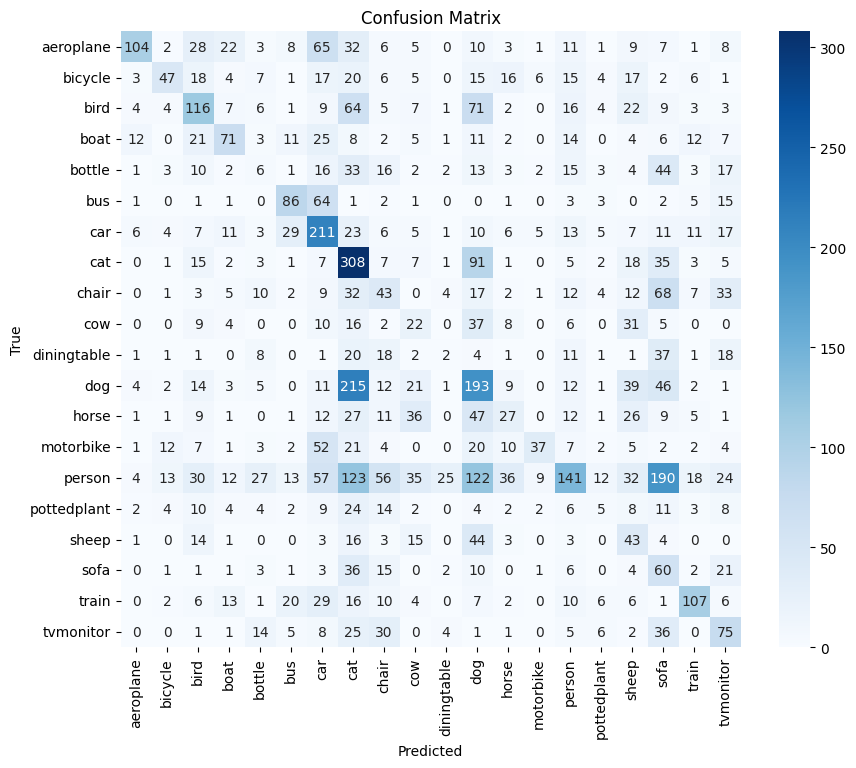

              precision    recall  f1-score   support

   aeroplane       0.72      0.32      0.44       326
     bicycle       0.48      0.22      0.31       210
        bird       0.36      0.33      0.34       354
        boat       0.43      0.33      0.37       215
      bottle       0.06      0.03      0.04       196
         bus       0.47      0.46      0.46       186
         car       0.34      0.54      0.42       391
         cat       0.29      0.60      0.39       512
       chair       0.16      0.16      0.16       265
         cow       0.13      0.15      0.14       150
 diningtable       0.05      0.02      0.02       128
         dog       0.27      0.33      0.29       591
       horse       0.20      0.12      0.15       227
   motorbike       0.58      0.19      0.29       192
      person       0.44      0.14      0.22       979
 pottedplant       0.08      0.04      0.05       124
       sheep       0.15      0.29      0.20       150
        sofa       0.10    

In [4]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Pascal VOC Dataset class
class PascalVOCDataset(Dataset):
    def __init__(self, root, image_set='train', transform=None):
        self.root = root
        self.image_set = image_set
        self.transform = transform
        
        # List of class names in Pascal VOC
        self.class_names = [
            "aeroplane", "bicycle", "bird", "boat", "bottle",
            "bus", "car", "cat", "chair", "cow", 
            "diningtable", "dog", "horse", "motorbike", 
            "person", "pottedplant", "sheep", "sofa", 
            "train", "tvmonitor"
        ]
        
        # Create class index mapping
        self.class_to_idx = {cls: idx for idx, cls in enumerate(self.class_names)}  
        self.image_ids = []
        self.labels = []
        self.load_data()

    def load_data(self):
        # Path to the image sets file
        image_set_file = os.path.join(self.root, 'ImageSets', 'Main', f'{self.image_set}.txt')
        
        with open(image_set_file, 'r') as f:
            image_ids = f.read().strip().split()

        # Loop through image IDs and load images and annotations
        for image_id in image_ids:
            image_path = os.path.join(self.root, 'JPEGImages', f'{image_id}.jpg')
            xml_path = os.path.join(self.root, 'Annotations', f'{image_id}.xml')
            label = self.parse_annotation(xml_path)
            self.image_ids.append(image_path)
            self.labels.append(label)

    def parse_annotation(self, xml_file):
        # This function extracts the main label (first object) from the XML file
        tree = ET.parse(xml_file)
        root = tree.getroot()

        # Extract the class name of the first object (single label classification)
        class_name = root.find('object').find('name').text
        if class_name in self.class_to_idx:
            return self.class_to_idx[class_name]
        else:
            return None

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        image = Image.open(self.image_ids[idx]).convert("RGB")
        label = torch.tensor(self.labels[idx], dtype=torch.long)  # Single-label classification

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define the root directory of the dataset
root_dir = r'C:\Users\bhara\Desktop\AIAss\VOC2012\VOCdevkit\VOC2012'

# Create the train dataset and data loader
train_dataset = PascalVOCDataset(root=root_dir, image_set='train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Create the validation dataset and data loader
val_dataset = PascalVOCDataset(root=root_dir, image_set='val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Initialize the ResNet-34 model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet34(pretrained=True)

# Modify the fully connected layer to include a dropout layer
num_classes = len(train_dataset.class_names)

# Define a new fully connected layer with dropout
model.fc = nn.Sequential(
    nn.Dropout(p=0.5),  # Dropout layer with 50% probability
    nn.Linear(model.fc.in_features, num_classes)  # Final classification layer
)

model.to(device)

# Define loss function and optimizer with increased weight decay
criterion = nn.CrossEntropyLoss()  # Suitable for single-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)  # Increased weight decay

# Training loop
num_epochs = 30  # Set the number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)
    
    # Print epoch loss and accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Accuracy: {correct / total:.4f}')

# Evaluation loop
model.eval()  # Set the model to evaluation mode
all_preds = []
all_targets = []

with torch.no_grad():
    correct = 0
    total = 0
    for images, targets in val_loader:
        images, targets = images.to(device), targets.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get class with highest score
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

        # Store predictions and true labels for confusion matrix
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

    print(f'Validation Accuracy: {correct / total:.4f}')

# Calculate confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=val_dataset.class_names, yticklabels=val_dataset.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(all_targets, all_preds, target_names=val_dataset.class_names))

# Save the trained model
torch.save(model.state_dict(), r'C:\Users\bhara\Desktop\AIAss\Classification\resnet34_single_label_model_with_dropout_weight_decay.pth')
